In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data  = datasets.MNIST(root="./data", train=False, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=64)

In [3]:
class TinyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)   # 1→8 channels
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)  # 8→16
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1) # 16→32
        self.fc = nn.Linear(32*3*3, 10)              # final classifier (10 digits)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # 28→14
        x = F.relu(F.max_pool2d(self.conv2(x), 2))  # 14→7
        x = F.relu(F.max_pool2d(self.conv3(x), 2))  # 7→3
        x = x.view(-1, 32*3*3)                      # flatten
        x = self.fc(x)
        return x

In [4]:
model = TinyCNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [5]:
for epoch in range(3):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        preds = model(x)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"epoch {epoch+1}, loss {total_loss/len(train_loader):.4f}")

epoch 1, loss 0.3607
epoch 2, loss 0.0913
epoch 3, loss 0.0678


In [6]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for x, y in test_loader:
        preds = model(x)
        correct += (preds.argmax(1) == y).sum().item()
        total += y.size(0)
print(f"accuracy: {correct/total:.3f}")

accuracy: 0.979


In [13]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [14]:
# 1️⃣ Load and transform image
img = Image.open("zero.png").convert("L")     # grayscale
img_inverted = ImageOps.invert(img)                # invert to white-on-black
transform = transforms.Compose([
    transforms.Resize((28, 28)),                   # match MNIST size
    transforms.ToTensor(),
])
x = transform(img_inverted).unsqueeze(0) 

In [15]:
# 1️⃣ Load and transform image
img = Image.open("zero.png").convert("L")     # grayscale
img_inverted = ImageOps.invert(img)                # invert to white-on-black
transform = transforms.Compose([
    transforms.Resize((28, 28)),                   # match MNIST size
    transforms.ToTensor(),
])
x = transform(img_inverted).unsqueeze(0) 

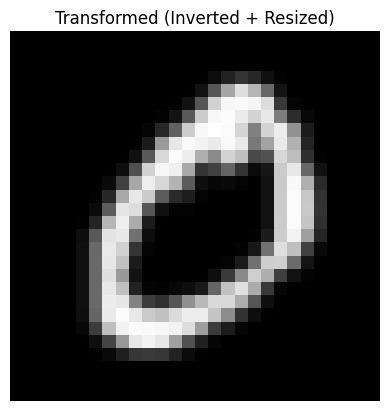

In [16]:
# 2️⃣ Display the transformed image
plt.imshow(x.squeeze(), cmap='gray')
plt.title("Transformed (Inverted + Resized)")
plt.axis("off")
plt.show()

In [17]:
# 3️⃣ Predict the digit
model.eval()
with torch.no_grad():
    preds = model(x)
    predicted = preds.argmax(1).item()

print(f"Predicted digit: {predicted}")

Predicted digit: 0
